In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [84]:
# set version
version = 8
full = False

# load metrics
if full:
    metrics = pd.read_csv("lightning_logs/nc_128/metrics.csv")#.drop(columns="step")
else:
    metrics = pd.read_csv(f"lightning_logs/version_{version}/metrics.csv").drop(
        columns="step"
    )
metrics

,epoch,nc_layer_0,nc_layer_1,nc_layer_2,nc_layer_3,nc_layer_4,nc_output,train_loss
0,0,2.211627,2.608296,2.728688,3.021890,3.297328,4.209332,0.585663
1,1,0.863732,1.068843,1.017757,1.058452,0.884845,0.923829,0.395824
2,2,0.787956,0.711270,0.692415,0.742432,0.644175,0.666755,0.328866
3,3,0.773953,0.614941,0.600426,0.651808,0.571997,0.604377,0.301481
4,4,0.830885,0.706248,0.675889,0.750037,0.604679,0.645797,0.311174
...,...,...,...,...,...,...,...,...
195,195,0.800667,0.597478,0.590271,0.688057,0.115002,0.112422,0.064714
196,196,0.801001,0.597757,0.590538,0.688383,0.115039,0.112339,0.064774
197,197,0.800734,0.599589,0.592301,0.690709,0.115004,0.111577,0.064736
198,198,0.800822,0.597929,0.590715,0.688550,0.115006,0.112293,0.064734


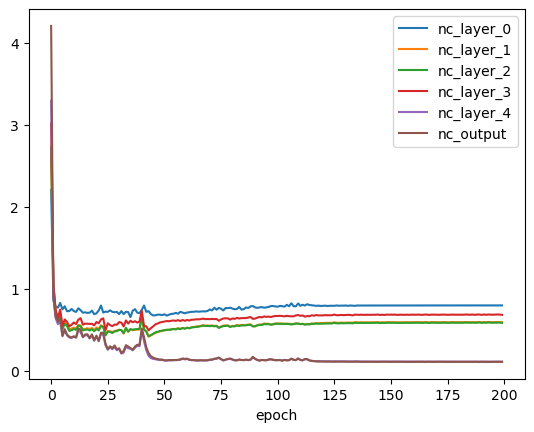

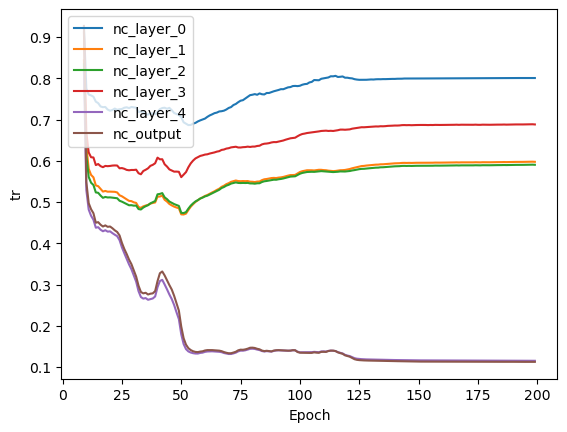

In [85]:
# plot NC1
nc_cols = metrics.columns[metrics.columns.str.contains("nc_")]
metrics.plot(x="epoch", y=nc_cols)
# plt.ylim(0,20000)
# plt.xlim(2,20)
plt.show()

# plot rolling average (window size == 10)
rolling_avg = metrics[nc_cols].rolling(10).mean()
plt.plot(metrics["epoch"], rolling_avg, label=rolling_avg.columns)
plt.legend()
# plt.ylim(0,2)
# plt.xlim(9,20)
plt.xlabel("Epoch")
plt.ylabel(r"$\operatorname{tr}$")
plt.show()

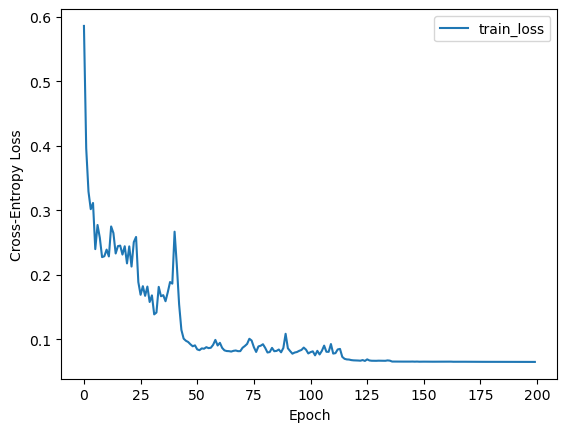

In [86]:
# plot train loss
metrics.plot(x="epoch", y=["train_loss"])
# plt.ylim(0.3,0.9)
# plt.xlim(0,150)
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.legend()
plt.show()

0.6568580269813538


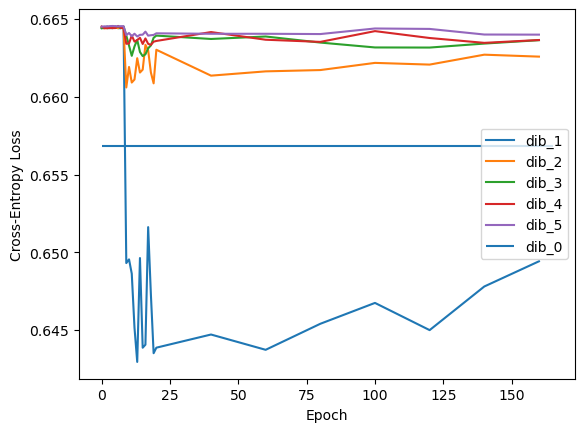

In [ ]:
# remove NaN rows
no_nan = metrics.dropna()
dib_0 = no_nan["dib_0"].iloc[0]
print(dib_0)

no_nan = metrics.drop(columns="dib_0").dropna()

# plot DIB
dib_cols = no_nan.columns[no_nan.columns.str.contains("dib_")]
no_nan.plot(x="epoch", y=dib_cols)
plt.hlines(dib_0, 0, metrics.shape[0], label="dib_0")
# plt.ylim(0.663, 0.665)
plt.legend()
plt.xlabel("Epoch")
plt.ylabel("Cross-Entropy Loss")
plt.show()

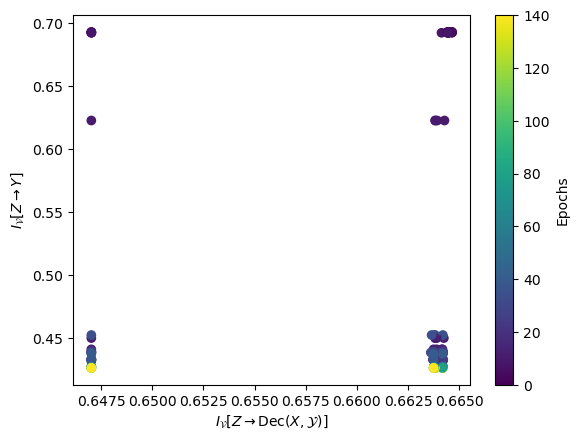

In [10]:
# IP analysis
for dib in dib_cols:
    plt.scatter(metrics[dib], metrics["train_loss"], cmap="viridis", c=metrics["epoch"])
    plt.plot(metrics[dib], metrics["train_loss"], color="gray", linewidth=0.5)
plt.xlabel(r"$I_{\mathcal{V}}[Z \to \operatorname{Dec}(X,\mathcal{Y})]$")
plt.ylabel(r"$I_{\mathcal{V}}[Z \to Y]$")
plt.colorbar(label="Epochs")
plt.show()